In [1]:
#importing the relevant libraries 
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
#Room dimensions
lr=398/100 #Length of the room
wr=305/100 #width of the room
hr=209/100 #Height of the room
ww=72/100  #width of the window
lw=159/100 #length of the window
wd=92/100  #width of the door
ld=220/100 #length of door
A_sidewall=wr*hr #Area of the wall with the window 
A_window=lw*ww #Area of window
A_door=wd*ld #area of the door
A_walls=lr*wr #area of the walls
A_door_wall=A_sidewall-A_door #area of door-wall
A_window_wall=A_sidewall-2*A_window #area of window wall 
V_room=lr*wr*hr #Volume of room 
A_fc=lr*wr #Area of ceiling and ground 

In [3]:
# Constants in the model
c_air=1005 #Specific heat of air 
density_air=1.205 #density of air 
shading_factor=0.95 #window shade in general 
glass_solar_factor=1 #specific to the window used
U_brick=0.6 #Thermal conductivity of the brick wall that is 15 cm thick 
U_glass=2.7 #Thermal conductivity of the double panel glass window 
U_tiles=1.1 #Thermal conductivity of the vitrified tile floors 
U_door=1.89  #Thermal conductivity of a steel door 
q_air=2.0*(3*0.25) #Air flow rate: Velocity of air times the area of the ventillation shaft 
beta=0 #Air recovery factor 
print(q_air)

1.5


In [4]:
t=np.linspace(0,23,24)
q_sun=np.array([0,0,0,0,0,4,55,196,538,748,875,937,929,850,709,518,297,88,1,0,0,0,0,0]) #Solar radiation over time
T_sun=np.array([29.4,29.1,28.8,28.5,26.7,26.9,28.7,31.8,34.6,37.1,38.8,39.9,40.8,41.4,41.6,41.4,40.8,38.9,36.1,34.2,32.8,31.5,30.6,29.9])
#Outdoor temperature for the day

In [5]:
def Q_sun(t_i): 
    return np.interp(t_i,t,q_sun,period=24) 
def Temp_sun(t_i):
    return np.interp(t_i,t,T_sun,period=24)

#The heat input from outdoors as given by raw data for its temp and intensity. 
#The interp function makes discrete variables continuous 


In [6]:
def Q_activity(t_i):
    if 20<=t_i<=24: 
        return 42
    elif 0<=t_i<=10:
        return 42
    else:
        return 20
#Activity due to movement sleep and metabolism during night hours on the dorm

In [7]:
def Q_in(t):
    return glass_solar_factor*shading_factor*2*A_window*2*Q_sun(t)+Q_activity(t)
# this calculates the energy at a given time t for the windows in the room+Internal heat gains. 

In [8]:
def Q_out(T,t):
    return (A_fc*U_tiles+2*A_walls*U_brick+A_window_wall*U_brick+A_door_wall*U_brick+A_window*U_glass+A_door*U_door+A_fc*U_brick)*(T-Temp_sun(t))+(1-beta)*c_air*density_air*q_air*(T-T_0)
#Output measures the losses from walls doors and ventillation 

In [9]:
def dTdt(T,t):
    return 1/(c_air*density_air*V_room)*(Q_in(t)-Q_out(T,t)) #Differential equation to model room temp. 

In [10]:
tau=24#Time period for which the model predicts 
dt=0.01 #Time step 
N=int(tau/dt) #number of datapoints 
Temp=np.zeros(N) #Initialising arrays 
time=np.zeros(N)
T_0=Temp[0]=29#Initial room temperature taken from the experimental data 
for i in range(0,N-1):
    Temp[i+1]=Temp[i]+dTdt(Temp[i],time[i])*dt #Integration using the Euler method 
    time[i+1]=time[i]+dt #Integration using the Euler method 

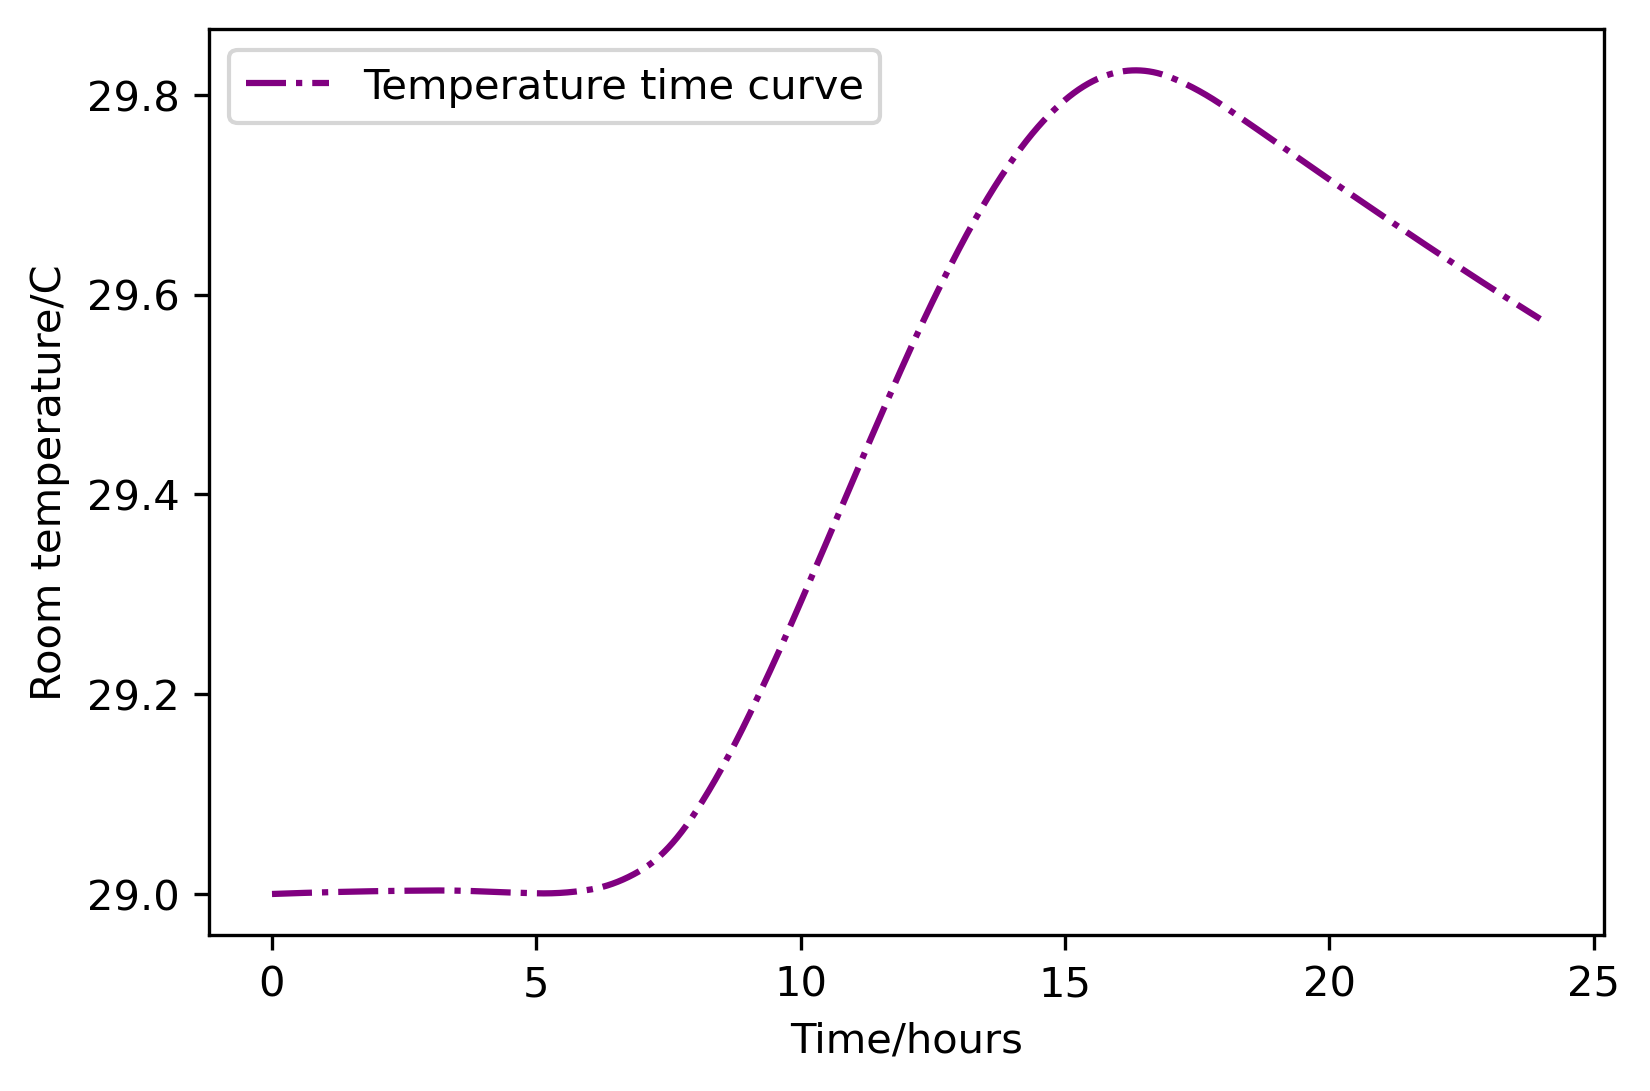

In [13]:
plt.plot(time,Temp,c='purple',ls='dashdot',label='Temperature time curve')
plt.xlabel('Time/hours')
plt.ylabel('Room temperature/C')
plt.legend()